# Get TROPOMI data

In [210]:
import numpy as np
import pandas as pd
boulder = np.load("Boulder3.npy",allow_pickle = True)
Greenbelt = np.load("Greenbelt.npy",allow_pickle = True)
print(boulder)

[['nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['-105.2418' '39.986176' '2.4904359e-05' '1.342167e-05' 'mol m-2'
  '2019-06-07T18:56:56.014000Z']
 ...
 ['-105.23735' '39.988377' '8.214416e-05' '5.2048457e-05' 'mol m-2'
  '2019-04-12T19:46:50.597000Z']
 ['nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['nan' 'nan' 'nan' 'nan' 'nan' 'nan']]


In [211]:
def get_df(city):
    NO2_trop_col = []
    time = []
    uncertainty = []
    lat = []
    lon = []
    for i in city:
        if i[0] != i[1]:
            if float(i[2])>=0:
                time.append(i[5])
                NO2_trop_col.append(float(i[2])*6.02e19)
                uncertainty.append(float(i[3])*6.02e19)
                lat.append(float(i[1]))
                lon.append(float(i[0]))
        else:
            pass
    city_df = pd.DataFrame({'timestamp':time,'NO2_trop_col':NO2_trop_col,'uncertainty':uncertainty,'lon':lon,'lat':lat})
    city_df['timestamp'] = pd.to_datetime(city_df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ')
    city_df = city_df.sort_values(by = 'timestamp')
    city_df = city_df[(city_df['timestamp']>='20190101')&(city_df['timestamp']<='201912312359')]
    city_group = city_df.groupby(pd.Grouper(key='timestamp',freq='1D'))
    city_avg = city_group.mean()
    city_avg = city_avg.reset_index()
    city_avg = city_avg.dropna()
    return city_avg

In [212]:
def get_df2(city):
    NO2_trop_col = []
    time = []
    uncertainty = []
    lat = []
    lon = []
    for i in city:
        if i[0] != i[1]:
            if float(i[2])>=0:
                time.append(i[4])
                NO2_trop_col.append(float(i[2])*6.02e19)
                uncertainty.append(float(i[3])*6.02e19)
                lat.append(float(i[1]))
                lon.append(float(i[0]))
        else:
            pass
    city_df = pd.DataFrame({'timestamp':time,'NO2_trop_col':NO2_trop_col,'uncertainty':uncertainty,'lon':lon,'lat':lat})
    city_df['timestamp'] = pd.to_datetime(city_df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ')
    city_df = city_df.sort_values(by = 'timestamp')
    city_df = city_df[(city_df['timestamp']>='20190101')&(city_df['timestamp']<='201912312359')]
    city_group = city_df.groupby(pd.Grouper(key='timestamp',freq='1D'))
    city_avg = city_group.mean()
    city_avg = city_avg.reset_index()
    city_avg = city_avg.dropna()
    return city_df

In [213]:
Boulder_tr = get_df(boulder)
Greenbelt_tr = get_df2(Greenbelt)

In [214]:
Boulder_tr

,timestamp,NO2_trop_col,uncertainty,lon,lat
0,2019-01-01,7.264647e+15,5.962795e+15,-105.250244,39.995766
1,2019-01-02,7.198784e+15,1.318731e+16,-105.267050,40.008860
2,2019-01-03,6.425771e+15,1.396132e+16,-105.269260,39.997772
3,2019-01-04,6.018577e+15,2.438232e+15,-105.265080,40.000370
4,2019-01-05,5.335356e+15,2.038719e+15,-105.246570,39.981840
...,...,...,...,...,...
359,2019-12-26,1.869023e+15,1.500319e+15,-105.285132,39.984256
360,2019-12-27,3.145719e+15,1.806161e+15,-105.270140,40.000170
362,2019-12-29,4.957944e+15,4.278642e+15,-105.247780,39.999626
363,2019-12-30,9.304563e+15,1.598192e+16,-105.248350,39.968925


# Get Pandora Data

In [42]:
import os
os.getcwd()

'C:\\Users\\张心怡\\Documents\\gitpull\\ACES'

In [215]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
def get_pandora_data(filename):
    fp=open(filename)
    lines = fp.readlines()
    line_list = []
    lat_raw = lines[14]
    lon_raw = lines[15]
    lat = float(lat_raw.split()[-1])
    lon = float(lon_raw.split()[-1])
    del lines[0:59]
    for i in lines:
        line = i.split()
        line[7] = float(line[7])
        line[8] = float(line[8])
        if len(line[0])<=16:
            line_list.append(line)
        elif len(line[0])>16:
            line[0] = line[0][0:15]+'Z'
    for i in range(len(line_list)):
        if line_list[i][7] < 0:
            line_list[i][7] = np.NaN
        if line_list[i][7] > 1e99:
            line_list[i][7] = np.NaN
    for i in range(len(line_list)):
        if abs(line_list[i][8]) >= 1:
            line_list[i][8] = np.NaN
    line_df = DataFrame(line_list)
    line_df = line_df[[0,7,8]]
    line_df['timestamp'] = pd.to_datetime(line_df[0],format='%Y%m%dT%H%M%SZ',errors = 'coerce')
    line_df['NO2_tot_col'] = line_df[7]*2.687e16
    line_df['NO2_uncertainty'] = line_df[8]*2.687e16 ##changing the units into mol/m^2
    line_df = line_df[['timestamp','NO2_tot_col','NO2_uncertainty']]
    line_df['lon'] = lon
    line_df['lat'] = lat
    line_df = line_df.dropna()
    return line_df

In [216]:
def get_pandora_data_trop(filename):
    fp=open(filename)
    lines = fp.readlines()
    line_list = []
    lat_raw = lines[14]
    lon_raw = lines[15]
    lat = float(lat_raw.split()[-1])
    lon = float(lon_raw.split()[-1])
    del lines[0:92]
    for i in lines:
        line = i.split()
        line[19] = float(line[19])
        line[20] = float(line[20])
        if len(line[0])<=16:
            line_list.append(line)
        elif len(line[0])>16:
            line[0] = line[0][0:15]+'Z'
    for i in range(len(line_list)):
        if line_list[i][19] < 0:
            line_list[i][19] = np.NaN
        if line_list[i][19] > 1e99:
            line_list[i][19] = np.NaN
    for i in range(len(line_list)):
        if abs(line_list[i][20]) >= 1:
            line_list[i][20] = np.NaN
    line_df = DataFrame(line_list)
    line_df = line_df[[0,19,20]]
    line_df['timestamp'] = pd.to_datetime(line_df[0],format='%Y%m%dT%H%M%SZ',errors = 'coerce')
    line_df['NO2_trop_col'] = line_df[19]*2.687e16
    line_df['NO2_uncertainty'] = line_df[20]*2.687e16 ##changing the units into mol/m^2
    line_df = line_df[['timestamp','NO2_trop_col','NO2_uncertainty']]
    line_df['lon'] = lon
    line_df['lat'] = lat
    line_df = line_df.dropna()
    return line_df

In [217]:
Boulder_pa = get_pandora_data('Pandora57s1_BoulderCO_L2Tot_rnvs1p1-7.txt')

In [218]:
Boulder_pa_trop = get_pandora_data_trop('Pandora57s1_BoulderCO_L2Trop_rnvh1p1-7.txt')

In [219]:
Greenbelt_pa = get_pandora_data('Pandora32s1_GreenbeltMD_L2Tot_rnvs0p1-5.txt')

In [220]:
Greenbelt_pa_trop = get_pandora_data_trop('Pandora32s1_GreenbeltMD_L2Trop_rnvh1p1-7.txt')

In [221]:
import datetime
from datetime import datetime
import pytz
from datetime import datetime, timedelta, timezone
import time
import seaborn as sns

In [222]:
def time_process(city):
    city = city[(city['timestamp']>='20190101')&(city['timestamp']<='201912312359')]
    return city

In [223]:
import math
def sort_and_avg(city,tz):
    time_mask = (city['timestamp'].dt.hour >= 13+tz) & (city['timestamp'].dt.hour <= 13+tz)
    city_passby = city[time_mask]
    city_passby_group = city_passby.groupby(pd.Grouper(key='timestamp',freq='1D'))
    city_passby_avg = city_passby_group.mean()
    city_passby_size = city_passby_group.size()
    unct_sum = city_passby_group['NO2_uncertainty'].sum()
    unct_var = city_passby_group['NO2_uncertainty'].var()
    for i in range(len(city_passby_avg)):
        city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)
    city_passby_avg = city_passby_avg.dropna()
    city_passby_avg = city_passby_avg.reset_index()
    return city_passby_avg

In [224]:
Boulder_pa = time_process(Boulder_pa)
Boulder_pa = sort_and_avg(Boulder_pa,6)
Boulder_pa

C:\Users\张心怡\AppData\Local\Temp/ipykernel_8996/3057100769.py:11: RuntimeWarning: invalid value encountered in double_scalars
  city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)


,timestamp,NO2_tot_col,NO2_uncertainty,lon,lat
0,2019-01-01,1.133358e+16,2.431905e+14,-105.26,39.99
1,2019-01-02,7.437461e+15,4.202879e+12,-105.26,39.99
2,2019-01-03,7.029220e+15,4.448669e+12,-105.26,39.99
3,2019-01-04,5.420982e+15,4.758302e+13,-105.26,39.99
4,2019-01-05,6.895346e+15,1.780905e+13,-105.26,39.99
...,...,...,...,...,...
312,2019-12-22,3.833805e+15,1.744078e+14,-105.26,39.99
313,2019-12-23,7.433291e+15,3.304516e+14,-105.26,39.99
314,2019-12-24,4.407117e+15,7.621511e+13,-105.26,39.99
315,2019-12-30,1.234269e+16,7.903948e+12,-105.26,39.99


In [225]:
Boulder_pa_trop = time_process(Boulder_pa_trop)
Boulder_pa_trop = sort_and_avg(Boulder_pa_trop,6)
Boulder_pa_trop

,timestamp,NO2_trop_col,NO2_uncertainty,lon,lat
0,2019-12-30,1.258537e+16,4.868251e+14,-105.26,39.99
1,2019-12-31,6.838449e+13,4.428866e+13,-105.26,39.99


In [226]:
Boulder_pa['timestamp']

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-05
         ...    
312   2019-12-22
313   2019-12-23
314   2019-12-24
315   2019-12-30
316   2019-12-31
Name: timestamp, Length: 317, dtype: datetime64[ns]

In [227]:
Greenbelt_pa = time_process(Greenbelt_pa)
Greenbelt_pa = sort_and_avg(Greenbelt_pa,4)
Greenbelt_pa

C:\Users\张心怡\AppData\Local\Temp/ipykernel_8996/3057100769.py:11: RuntimeWarning: invalid value encountered in double_scalars
  city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)


,timestamp,NO2_tot_col,NO2_uncertainty,lon,lat
0,2019-01-01,4.181767e+15,1.847164e+15,-76.8396,38.9926
1,2019-01-02,8.033237e+15,1.212713e+14,-76.8396,38.9926
2,2019-01-03,7.924072e+15,8.403104e+14,-76.8396,38.9926
3,2019-01-04,9.179150e+15,4.666213e+14,-76.8396,38.9926
4,2019-01-05,1.376784e+16,2.376921e+15,-76.8396,38.9926
...,...,...,...,...,...
295,2019-12-26,1.035001e+16,1.718622e+13,-76.8396,38.9926
296,2019-12-27,6.950313e+15,1.374391e+15,-76.8396,38.9926
297,2019-12-28,4.186195e+15,7.019601e+12,-76.8396,38.9926
298,2019-12-30,3.411146e+15,2.123116e+15,-76.8396,38.9926


In [228]:
Greenbelt_pa_trop = time_process(Greenbelt_pa_trop)
Greenbelt_pa_trop = sort_and_avg(Greenbelt_pa_trop,4)
Greenbelt_pa_trop

C:\Users\张心怡\AppData\Local\Temp/ipykernel_8996/3057100769.py:11: RuntimeWarning: invalid value encountered in double_scalars
  city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)


,timestamp,NO2_trop_col,NO2_uncertainty,lon,lat
0,2019-03-28,2.661506e+15,2.067363e+14,-76.8396,38.9926
1,2019-03-29,7.395215e+15,4.936494e+14,-76.8396,38.9926
2,2019-05-28,2.286707e+15,1.767723e+14,-76.8396,38.9926
3,2019-05-30,4.192204e+15,3.701506e+14,-76.8396,38.9926
4,2019-06-02,2.253200e+15,1.840973e+14,-76.8396,38.9926
5,2019-06-03,2.120484e+15,2.216153e+14,-76.8396,38.9926
6,2019-06-05,3.297916e+15,2.695968e+14,-76.8396,38.9926
7,2019-06-06,2.362271e+15,2.371608e+14,-76.8396,38.9926
8,2019-06-07,1.603983e+15,1.314711e+14,-76.8396,38.9926
9,2019-06-08,1.299729e+15,1.083598e+14,-76.8396,38.9926


# Boulder

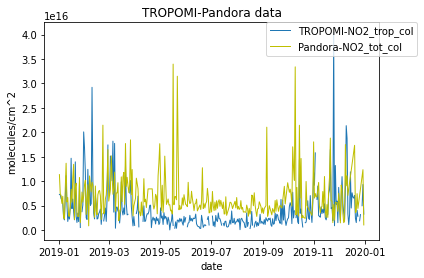

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(Boulder_tr['timestamp'], Boulder_tr['NO2_trop_col'],linewidth=1,label='TROPOMI-NO2_trop_col')
plt.plot(Boulder_pa['timestamp'], Boulder_pa['NO2_tot_col'],c='y',linewidth=1,label='Pandora-NO2_tot_col')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)
plt.xlabel('date')
plt.ylabel('molecules/cm^2')
plt.title('TROPOMI-Pandora data')
plt.show()

# Changing the datetime object to julian day

In [62]:
from scipy import interpolate
import astropy
from astropy.time import Time

In [203]:
Boulder_tr['timestamp'] = Time(Boulder_tr['timestamp']).jd

In [204]:
Boulder_pa['timestamp'] = Time(Boulder_pa['timestamp']).jd

# Interpolating the two dataframes

In [205]:
##interpolating TROPOMI against Pandora(trop)
f_tropomi = interpolate.interp1d(Boulder_tr['timestamp'],Boulder_tr['NO2_trop_col'],bounds_error=False)
tropomi_Boulder_interp = f_tropomi(Boulder_pa['timestamp'])

# Defining scatter plot function

In [110]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

In [234]:
def create_scatter_plot(x,y):
    # using subplots again allows us to easily plot additional information in the same plot
    fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

    # compare x and y variables using a scatter plot
    ax.scatter(x, y)

    # add a red 1 to 1 line
    line = mlines.Line2D([0, 1], [0, 1], color='red')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)

# Drawing the scatter plot for Pandora(NO2_tot_col) and TROPOMI

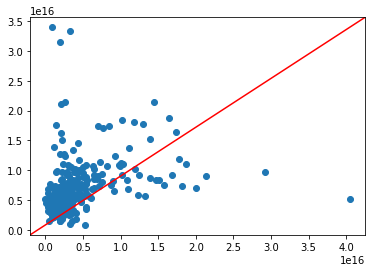

In [206]:
create_scatter_plot(tropomi_Boulder_interp,Boulder_pa['NO2_tot_col'])

# Calculating R^2

In [190]:
from sklearn.metrics import r2_score

In [207]:
# calculate the 'r squared' between pandora_tot and interpolated TROPOMI
print(r2_score(tropomi_Boulder_interp,Boulder_pa['NO2_tot_col']))

-0.7078706420895535


# Linear regression

0.3175757655530394 5504413700597593.0


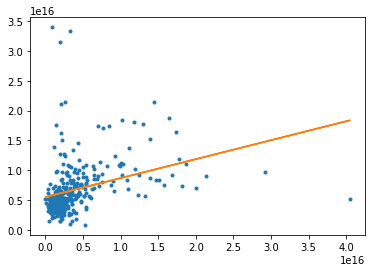

In [208]:
#TROPOMI and Pandora(NO2_tot_col)
m, b = np.polyfit(tropomi_Boulder_interp,Boulder_pa['NO2_tot_col'], 1)
print(m,b)

# plot the original data points as well as the line of best fit
plt.plot(tropomi_Boulder_interp,Boulder_pa['NO2_tot_col'],".")
plt.plot(tropomi_Boulder_interp, b + m * tropomi_Boulder_interp, '-')
plt.show()

# Greenbelt

# Drawing plots containing data from both Pandora and TROPOMI

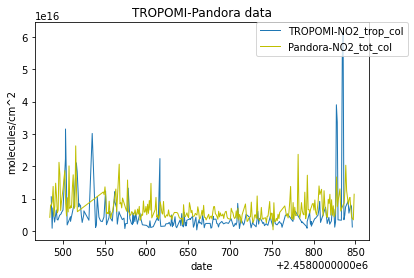

In [202]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(Greenbelt_tr['timestamp'], Greenbelt_tr['NO2_trop_col'],linewidth=1,label='TROPOMI-NO2_trop_col')
plt.plot(Greenbelt_pa['timestamp'], Greenbelt_pa['NO2_tot_col'],c='y',linewidth=1,label='Pandora-NO2_tot_col')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)
plt.xlabel('date')
plt.ylabel('molecules/cm^2')
plt.title('TROPOMI-Pandora data')
plt.show()

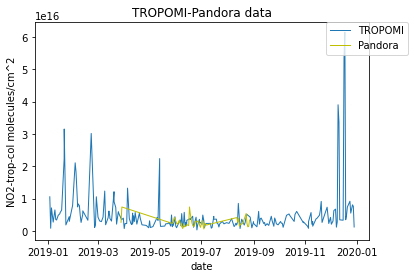

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(Greenbelt_tr['timestamp'], Greenbelt_tr['NO2_trop_col'],linewidth=1,label='TROPOMI')
plt.plot(Greenbelt_pa_trop['timestamp'], Greenbelt_pa_trop['NO2_trop_col'],c='y',linewidth=1,label='Pandora')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)
plt.xlabel('date')
plt.ylabel('NO2-trop-col molecules/cm^2')
plt.title('TROPOMI-Pandora data')
plt.show()

# Changing the datetime object to julian day

In [229]:
Greenbelt_tr['timestamp'] = Time(Greenbelt_tr['timestamp']).jd

In [230]:
Greenbelt_pa_trop['timestamp'] = Time(Greenbelt_pa_trop['timestamp']).jd

In [231]:
Greenbelt_pa['timestamp'] = Time(Greenbelt_pa['timestamp']).jd

In [232]:
Greenbelt_tr['timestamp']

77     2.458486e+06
143    2.458487e+06
3      2.458488e+06
18     2.458490e+06
98     2.458492e+06
           ...     
43     2.458841e+06
45     2.458842e+06
137    2.458844e+06
172    2.458845e+06
12     2.458846e+06
Name: timestamp, Length: 228, dtype: float64

# Interpolating the two dataframes

In [174]:
##interpolating TROPOMI against Pandora(trop)
f_tropomi = interpolate.interp1d(Greenbelt_tr['timestamp'],Greenbelt_tr['NO2_trop_col'],bounds_error=False)
tropomi_Greenbelt_interp = f_tropomi(Greenbelt_pa_trop['timestamp'])

In [175]:
##interpolating TROPOMI against Pandora(tot)
f_tropomi = interpolate.interp1d(Greenbelt_tr['timestamp'],Greenbelt_tr['NO2_trop_col'],bounds_error=False)
tropomi_Greenbelt_interp_2 = f_tropomi(Greenbelt_pa['timestamp'])

# Drawing the scatter plot for Pandora(NO2_trop_col) and TROPOMI

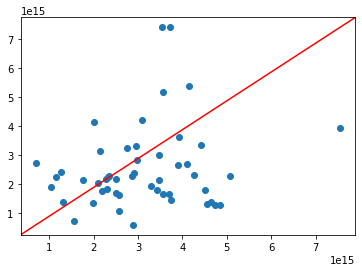

In [176]:
create_scatter_plot(tropomi_Greenbelt_interp,Greenbelt_pa_trop['NO2_trop_col'])

# Drawing the scatter plot for Pandora(NO2_tot_col) and TROPOMI

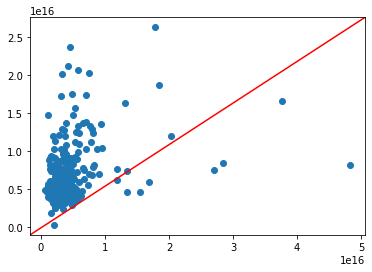

In [187]:
create_scatter_plot(tropomi_Greenbelt_interp_2,Greenbelt_pa['NO2_tot_col'])

# Removing the NaN in data

In [178]:
r2 = pd.DataFrame(tropomi_Greenbelt_interp_2)

In [179]:
r2['2']=Greenbelt_pa['NO2_tot_col']

In [180]:
r2 = r2.dropna()

In [181]:
Greenbelt_pa['NO2_tot_col']

0      4.181767e+15
1      8.033237e+15
2      7.924072e+15
3      9.179150e+15
4      1.376784e+16
           ...     
295    1.035001e+16
296    6.950313e+15
297    4.186195e+15
298    3.411146e+15
299    1.134969e+16
Name: NO2_tot_col, Length: 300, dtype: float64

# Calculating R squares

In [190]:
from sklearn.metrics import r2_score

In [191]:
# calculate the 'r squared' between pandora_tot and interpolated TROPOMI
print(r2_score(r2[0],r2['2'],))

-0.4208812754794886


In [192]:
# calculate the 'r squared' between pandora_trop and interpolated TROPOMI
print(r2_score(Greenbelt_pa_trop['NO2_trop_col'],tropomi_Greenbelt_interp))

-0.6159045430440615


# Linear regression

0.2621568138744528 5716834395713867.0


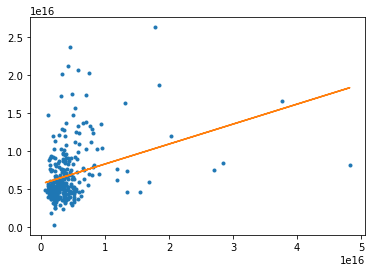

In [201]:
#TROPOMI and Pandora(NO2_tot_col)
m, b = np.polyfit(r2[0],r2['2'], 1)
print(m,b)

# plot the original data points as well as the line of best fit
plt.plot(r2[0],r2['2'],".")
plt.plot(r2[0], b + m * r2[0], '-')
plt.show()

0.2132971641123515 1868114975554046.8


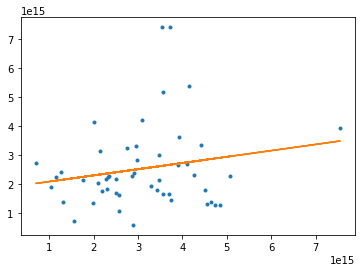

In [199]:
#TROPOMI and Pandora(NO2_trop_col)
m, b = np.polyfit(tropomi_Greenbelt_interp, Greenbelt_pa_trop['NO2_trop_col'], 1)
print(m,b)
# plot the original data points as well as the line of best fit
plt.plot(tropomi_Greenbelt_interp, Greenbelt_pa_trop['NO2_trop_col'],".")
plt.plot(tropomi_Greenbelt_interp, b + m * tropomi_Greenbelt_interp, '-')
plt.show()

# Stratospheric NO2 column

In [233]:
f_pandora_tot = interpolate.interp1d(Greenbelt_pa['timestamp'],Greenbelt_pa['NO2_tot_col'],bounds_error=False)
pa_Greenbelt_interp = f_pandora_tot(Greenbelt_pa_trop['timestamp'])

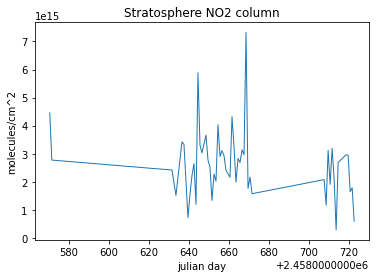

In [238]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(Greenbelt_pa_trop['timestamp'], pa_Greenbelt_interp-Greenbelt_pa_trop['NO2_trop_col'],linewidth=1)
plt.xlabel('julian day')
plt.ylabel('molecules/cm^2')
plt.title('Stratosphere NO2 column')
plt.show()

c:\users\张心怡\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\张心怡\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


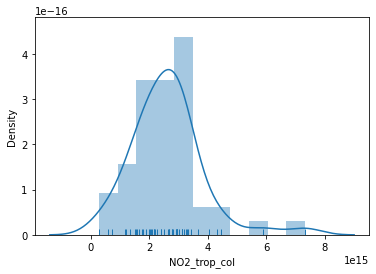

In [239]:
import seaborn as sns
ax1 = sns.distplot(pa_Greenbelt_interp-Greenbelt_pa_trop['NO2_trop_col'], rug=True, hist=True)
plt.show()

In [240]:
(pa_Greenbelt_interp-Greenbelt_pa_trop['NO2_trop_col']).std()

1225237913796988.0

In [241]:
(pa_Greenbelt_interp-Greenbelt_pa_trop['NO2_trop_col']).mean()

2619577934673239.5

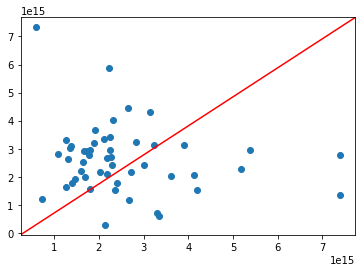

In [245]:
## Drawing scatter plot between Pandora NO2 stat col and Pandora NO2 trop col
create_scatter_plot(Greenbelt_pa_trop['NO2_trop_col'],pa_Greenbelt_interp-Greenbelt_pa_trop['NO2_trop_col'])

-0.16130214832376594 3027670476723137.5


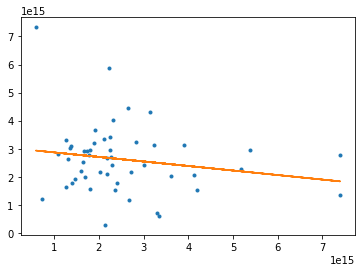

In [246]:
## linear regression between Pandora NO2 stat col and Pandora NO2 trop col
m, b = np.polyfit(Greenbelt_pa_trop['NO2_trop_col'],pa_Greenbelt_interp-Greenbelt_pa_trop['NO2_trop_col'], 1)
print(m,b)
# plot the original data points as well as the line of best fit
plt.plot(Greenbelt_pa_trop['NO2_trop_col'],pa_Greenbelt_interp-Greenbelt_pa_trop['NO2_trop_col'],".")
plt.plot(Greenbelt_pa_trop['NO2_trop_col'], b + m * Greenbelt_pa_trop['NO2_trop_col'], '-')
plt.show()

In [247]:
print(r2_score(Greenbelt_pa_trop['NO2_trop_col'],pa_Greenbelt_interp-Greenbelt_pa_trop['NO2_trop_col']))

-1.0637908808820016
